## Unsupervised Learning

Unlabeled data refers to a dataset that does not have any predefined categories or class labels. It consists of raw data points without any additional information. On the other hand, labeled data is a dataset that has been annotated with predefined categories or class labels.

In the context of clustering in unsupervised learning, the availability of labeled or unlabeled data is relevant in different ways. 

- Labeled data can be used for evaluation purposes in clustering algorithms. By comparing the clustering results with the known labels, we can assess the performance of the algorithm in assigning data points to the correct clusters.

- Unlabeled data, on the other hand, is commonly used in unsupervised learning for clustering. Clustering algorithms aim to group similar data points together based on their inherent patterns or similarities. Without predefined labels, these algorithms rely solely on the structure and relationships within the data to identify clusters.


## Clustering

Clustering is a technique in unsupervised learning that aims to group similar data points together based on their inherent patterns or similarities. It is used to discover hidden structures or relationships within a dataset without any predefined categories or class labels.

There are several common techniques used for clustering:

1. K-means clustering: This is a centroid-based clustering algorithm that partitions the data into K clusters, where K is a user-defined parameter. It aims to minimize the within-cluster sum of squares.

2. Hierarchical clustering: This is a bottom-up approach that creates a hierarchy of clusters. It starts with each data point as a separate cluster and then merges the closest clusters iteratively until a stopping criterion is met.

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): This algorithm groups together data points that are close to each other in terms of a density criterion. It is capable of discovering clusters of arbitrary shape and can handle noise points.

4. Gaussian Mixture Models (GMM): This is a probabilistic model that represents the data as a mixture of Gaussian distributions. It assigns each data point to one of the Gaussian components based on the probability.

### Hierarchical clustering

```
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
```
### K-means clustering

```
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
```

### Data preparation

Data preparation is an important step in the clustering process. It involves transforming and pre-processing the data to make it suitable for clustering algorithms. Here are a few reasons why we need to prepare data for clustering:

1. **Normalization**: Clustering algorithms are sensitive to the scale of the data. If the features have different scales, it can lead to biased results. Therefore, it is important to normalize the data to a common scale before clustering.

2. **Handling Missing Values**: Clustering algorithms usually cannot handle missing values. Therefore, it is necessary to handle missing values in the data by either imputing them or removing the corresponding samples.

3. **Feature Selection**: Not all features may be relevant for clustering. It is important to select the most informative features that contribute to the clustering process. This helps in reducing noise and improving the quality of the clusters.

4. **Outlier Detection**: Outliers can significantly affect the clustering results. It is important to detect and handle outliers before clustering to ensure that they do not distort the clusters.

5. **Dimensionality Reduction**: High-dimensional data can be challenging for clustering algorithms. Dimensionality reduction techniques like Principal Component Analysis (PCA) or t-SNE can be used to reduce the dimensionality of the data while preserving its structure.

By preparing the data before clustering, we can improve the accuracy and interpretability of the clustering results.

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


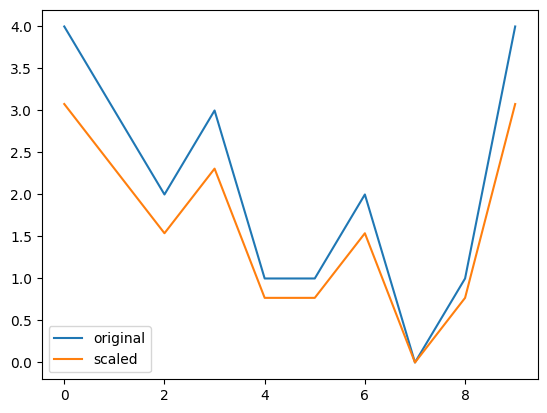

In [3]:
# Normalization Example using Whiten

# Import the whiten function
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)
      
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

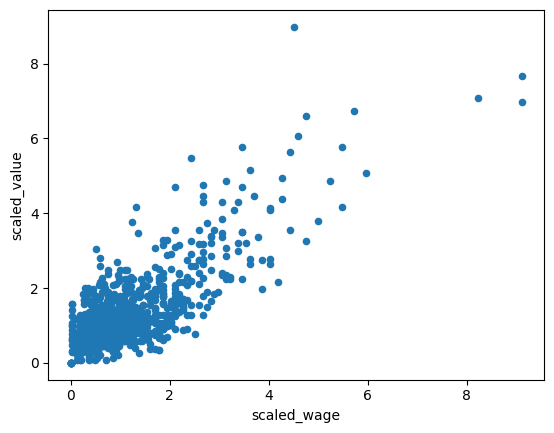

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [8]:
import pandas as pd

fifa = pd.read_csv('datasets/fifa_18_sample_data.csv')
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())


### Hierarchical Clustering Continued

Which method should use? 

- `single`: based on two closest objects 
- `complete`: based on two farthest objects 
- `average`: based on the arithmetic mean of all objects 
- `centroid`: based on the geometric mean of all objects 
- `median`: based on the median of all objects 
- `ward`: based on the sum of squares

```
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

### Dendrogram

A dendrogram is a tree-like diagram that represents the hierarchical structure of clusters in a dataset. It is commonly used in clustering analysis to visualize the results of hierarchical clustering algorithms. 

In a dendrogram, each data point is represented by a leaf node, and the clusters are represented by internal nodes. The height of each node in the dendrogram represents the distance between clusters or data points. The longer the branch, the greater the dissimilarity between the clusters or data points.

Dendrograms are useful for understanding the relationships between clusters and identifying the optimal number of clusters in a dataset. By cutting the dendrogram at a certain height, we can obtain different levels of clustering solutions.

To create a dendrogram, we need to calculate the pairwise distances between data points or clusters and use a linkage method to determine how to merge clusters at each step. The linkage method defines the distance between clusters based on different criteria, such as the distance between the closest points (single linkage), the distance between the farthest points (complete linkage), or the average distance between all points (average linkage).

Once the dendrogram is created, we can visually inspect it to identify clusters at different levels of similarity or dissimilarity. This can help in making decisions about the appropriate number of clusters to use in further analysis.

```
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()
```
![image](image.png)


### K-means Continued:

Two steps of k-means clustering:

- Define cluster centers through `kmeans()` function. It has two required arguments: observations and number of clusters.
- Assign cluster labels through the `vq()` function. It has two required arguments: observations and cluster centers.

```
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

![image](second_image.png)


How many K? Use Elbow Plot to determine optimal value of K

```
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()
```
![image](third_image.png)

However Elbow plot doesn't always work when data is uniformly distributed:

![image](fourth_image.png)


### Impact of seeds on distinct clusters

```
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```
![image](fifth_image.png)

```
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```
![image](sixth_image.png)

The plots have not changed after changing the seed as the clusters are well-defined.


                scaled_def  scaled_phy
cluster_labels                        
0                 1.951180    7.167028
1                 3.817844    9.020452
2                 2.070553    9.070160


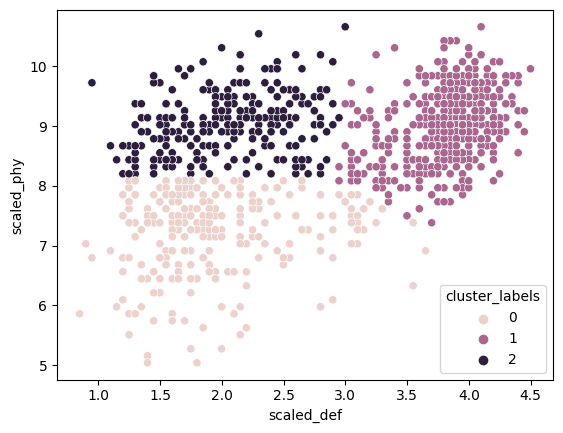

In [12]:
from numpy import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten

# Set up a random seed in numpy
fifa = pd.read_csv('datasets/fifa_18_sample_data.csv')

#random.seed([1000,2000])
#random.seed(0)
random.seed(123)

# Use the whiten() function to standardize the data
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

The seed has an impact on clustering as the data is uniformly distributed.

### KMeans Clustering for Dominant Colours

KMeans can be used to identify dominant colours in images.

### Document Clustering

Document clustering, also known as text clustering or text categorization, is the task of grouping similar documents together based on their content. It is a common technique used in natural language processing and information retrieval to organize large collections of text documents into meaningful clusters. The goal of document clustering is to discover hidden patterns and relationships among documents, allowing for easier navigation, search, and analysis of textual data.

There are various algorithms and approaches that can be used for document clustering, including hierarchical clustering, k-means clustering, and latent Dirichlet allocation (LDA). These algorithms consider the similarity between documents based on features such as word frequencies, TF-IDF scores, or topic distributions.

Document clustering has applications in various domains, such as document organization, recommendation systems, information retrieval, and text mining. It can be used to group news articles, customer reviews, research papers, social media posts, and other types of textual data.



```
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50, min_df=0.1,tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)
```
With the created sparse matrix, you can generate cluster centers and print the top three terms in each cluster. Use the .todense() method to convert the sparse matrix, tfidf_matrix to a normal matrix for the kmeans() function to process. Then, use the .get_feature_names() method to get a list of terms in the tfidf_vectorizer object. The zip() function in Python joins two lists.

```
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])
    
        ['father', 'back', 'one']
    ['police', 'man', 'killed']
```

### Clustering with Multiple Features


                scaled_pac  scaled_sho  ...  scaled_def  scaled_phy
cluster_labels                          ...                        
0                 6.684070    5.430915  ...    2.500552    8.334066
1                 5.454041    3.668379  ...    3.966702    9.209874

[2 rows x 6 columns]


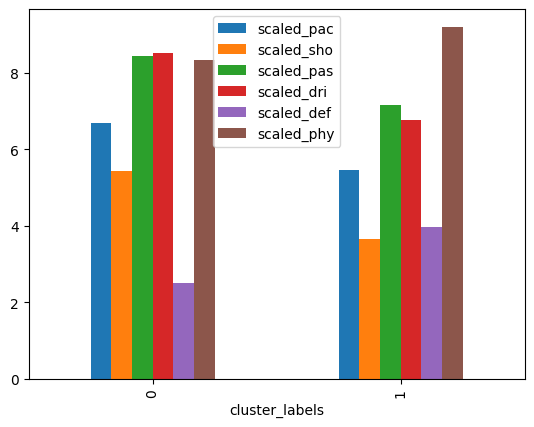

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, vq, kmeans

# Set up a random seed in numpy
fifa = pd.read_csv('datasets/fifa_18_sample_data.csv')

features = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']

# Scaling the specified features using whiten
scaled_values = fifa[features].apply(whiten)

# Adding scaled features to the existing fifa DataFrame
scaled_feature_names = ['scaled_' + feature for feature in features]
for i, scaled_feature in enumerate(scaled_feature_names):
    fifa[scaled_feature] = scaled_values.iloc[:, i]

scaled_features = ['scaled_pac','scaled_sho','scaled_pas','scaled_dri','scaled_def','scaled_phy']

# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])